In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import gc

gc.collect()

0

In [4]:
X_train_canvas = np.load('dataset/X_train_canvas.npy')
coords = np.load('dataset/coords.npy')
y_train = np.load('dataset/y_train.npy')
X_test_canvas = np.load('dataset/X_test_canvas.npy')
coords_test = np.load('dataset/coords_test.npy')
y_test = np.load('dataset/y_test.npy')

In [5]:
X_train_2d = X_train_canvas.reshape(X_train_canvas.shape[0], 128, 128)
X_test_2d = X_test_canvas.reshape(X_test_canvas.shape[0], 128, 128)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128,128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(248, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Number of neurons for each class
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\aless\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
from tensorflow.keras.callbacks import TensorBoard

In [17]:
from tensorflow.keras.callbacks import TensorBoard
import os
import tensorflow as tf

log_dir = "logs"
tensorboard_callback = TensorBoard(log_dir=log_dir)

checkpoint_path = "training_1"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'single_epoch_{epoch:02d}.weights.h5'),
                                                 save_weights_only=True,
                                                 verbose=1)


num_epochs = 20
model_run = model.fit(
    X_train_2d,
    y_train,
    epochs=num_epochs,
    batch_size=512,
    validation_data=(X_test_2d, y_test),
    callbacks=[tensorboard_callback, cp_callback],
)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4156 - loss: 1.4149
Epoch 1: saving model to single_epoch_01.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.4159 - loss: 1.4143 - val_accuracy: 0.6035 - val_loss: 1.0488
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5648 - loss: 1.0696
Epoch 2: saving model to single_epoch_02.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.5650 - loss: 1.0692 - val_accuracy: 0.7071 - val_loss: 0.7446
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6866 - loss: 0.7882
Epoch 3: saving model to single_epoch_03.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.6867 - loss: 0.7880 - val_accuracy: 0.7903 - val_loss: 0.5818
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7707 - loss: 0.5995
Epoch 4: saving model to single_epoch_04.weights.h5
118/118 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.7708 - loss: 0.5993 - val_accuracy: 0.8330

The history has the following data:  dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aless\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0, 0.5, 'accuracy')

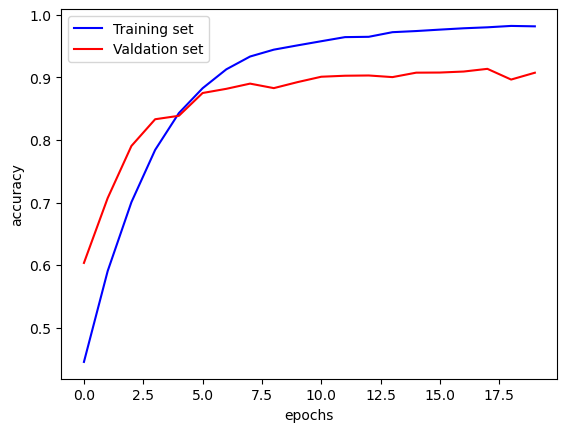

In [18]:
history_model = model_run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(
    x=model_run.epoch, y=history_model["accuracy"], color="blue", label="Training set"
)
sns.lineplot(
    x=model_run.epoch,
    y=history_model["val_accuracy"],
    color="red",
    label="Valdation set",
)
plt.xlabel("epochs")
plt.ylabel("accuracy")

In [7]:
cp_dir = 'H:\\aless\Documents\Python_Scripts\Matur\mnist\\training_1\single\single_epoch_18.weights.h5'

model.load_weights(cp_dir)

# Evaluating the model on test dataset
model.evaluate(X_test_2d, y_test)

c:\Users\aless\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8986 - loss: 0.5033


[0.41132351756095886, 0.9135000109672546]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


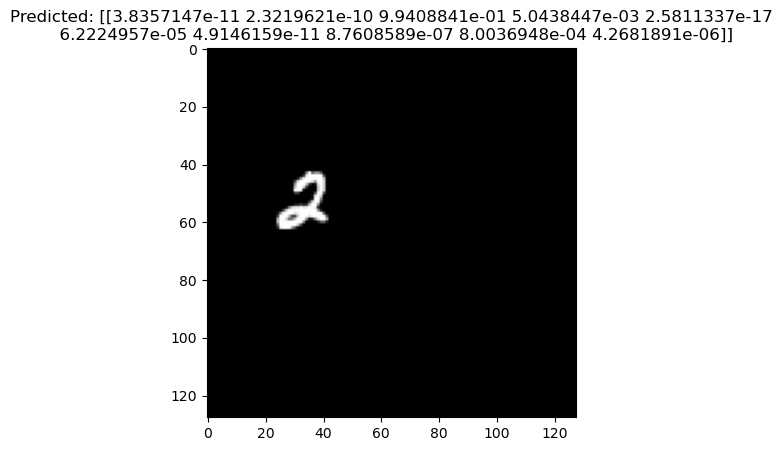

In [8]:
random_sample = np.random.randint(0, X_test_2d.shape[0])

image = X_test_2d[random_sample]
prediction = model.predict(X_test_2d[random_sample].reshape(1, 128, 128, 1))

plt.imshow(image, cmap='gray')
plt.title(f"Predicted: {prediction}")
plt.show()